# Das Farbbild als Matrix
Version 7.11.2020, S. Mack  

Bilder sind mathematisch gesehen Matrizen. Die Datentypen dafür nennt man Arrays. OpenCV-Python verwendet spezielle Array-Datentypen aus der Bibliothek Numpy.  
**Letztlich sind alle Bildverarbeitungsoperationen Matrixalgebra - also das Rechnen mit Matrizen**. Bei MATLAB wie auch bei Numpy sind viele Array-Operationen als auf Rechenzeit optimiert Funktionen vorhanden. Daher eignen sich diese Programme für Bildverarbeitungsroutinen. Die Algroithmen hierfür wurden in der Programmiersprache C geschrieben und werden als Laufzeitbibliothken von MATLAB bzw. Python eingebunden. 
Nachfolgend wird gezeigt, wie ein Farbbild in eine Matrix geladen wird, wie man diese Matrix analysiert und sie mit einfachen mathematischen Operatioinen manipuliert.

## Laden eines Farbbildes
Für die OpenCV-Funktionen wird die Bibliothek OpenCV-Python unter dem Kürzel `cv2` und für die Bild- und Grafikdarstellung die Bibliothek Pyplot aus Matplotlib importiert. Der Befehl `%matplotlib inline` bewirkt, dass die Ausgabgrafiken innerhalb dieses Notebooks dargestellt werden. Dieser Befehl sollte innerhalb der IDE Spyder nicht verwendet werden, da hier die Grafiken als eigene Fenster ausgegeben werden sollen. Diese Fenster erlauben, die angezeigte Grafik mit der Maus zu analysieren oder zu zoomen, was hier im Jupyter Notebook leider nicht in jedem Browser möglich ist.  

Dimension der Bildmatrix:  (271, 400, 3)
Datentyp Elemente der Bildmatrix.  uint8
Kleinstes Matrixelement:  0
Größtes Matrixelement:  254


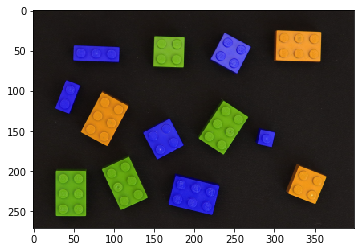

In [1]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('lego.png') # Bilddatei laden
print('Dimension der Bildmatrix: ',img1.shape)
print('Datentyp Elemente der Bildmatrix. ',img1.dtype)
print('Kleinstes Matrixelement: ',img1.min())
print('Größtes Matrixelement: ',img1.max())
plt.imshow(img1) # Bild darstellen

Die Bilddatei lego.png beinhaltet ein Foto von Legosteinen der Farbe Rot, Grün und Blau. Es ist ein echtes mit einer Digitalkamera aufgenommenes Bild, welche anschließend verkleinert wurde. Der schwarze Hintergund wurde gewählt, um die Bildverarbeitung möglichst einfach zu halten.  
Das Bild hat 400 x 271 Farbpixel und besteht daher aus einer 271 x 400 x 3 Matrix, welche in diesem Fall in Python als "Numpy Array"-Datentyp vorliegt.  
Farbbilder sind üblicherweise im RGB-Format abgespeichert: D.h. für jeden Pixel gibt es einen Farbwert für Rot, Grün und Blau. Somit besteht ein Farbbild aus einer roten, einer grünen und einer blauen Matrix, welche die selbe Größe hat wie das Pixelarray der Kamera - in diesem Fall 400 x 271 Pixel. Jedes Matrixelement ist eine vorzeichenlose 8-Bit Integerzahl ("uint8").  
Das Element (0,0) ist die obere linke Ecke. Die erste Komponente ist dabei die y-Achse (nach unten) und die zweite Komponente die x-Achse (nach rechts).  
Nun erscheint keiner der Legosteine oben in einer wirklich roten Farbe. Dies liegt daran, dass OpenCV annimmt, das vorliegende Bild wäre nicht im RGB- sondern im BGR-Format kodiert. Daher muss das Bild `img1` mit einer OpenCV-Funktion noch entsprechend konvertiert werden:

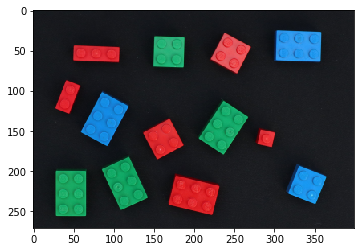

In [2]:
img2 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB) # Konvertierung in RGB
plt.imshow(img2)

## Extraktion der Submatrizen für Rot, Grün und Blau
Mit der folgenden Arrayfunktion lässt sich die rote Matrix extrahieren. Sie wird anschließend als Grauwertbild dargestellt. Null entspricht Schwarz und 255 entspricht Weiß, was durch die Matplotlib Colormap `Greys_r` spezifiziert wird).

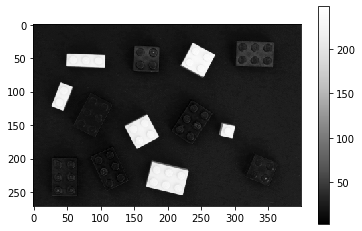

In [3]:
imgRed = img2[:,:,0]
plt.imshow(imgRed,cmap="Greys_r")
plt.colorbar() # Colorbar mit darstellen

Das Gleiche kann man auch mit der Farbe Grün machen...

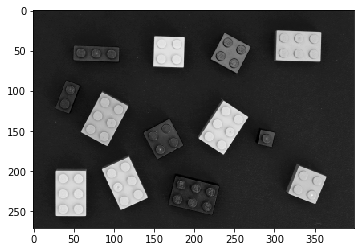

In [4]:
imgGreen = img2[:,:,1]
plt.imshow(imgGreen,cmap="Greys_r")

... sowie mit der Farbe Blau:

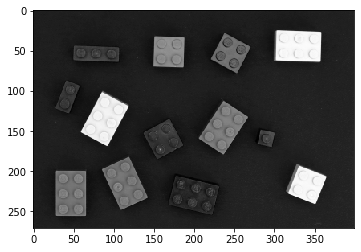

In [5]:
imgBlue = img2[:,:,2]
plt.imshow(imgBlue,cmap="Greys_r")

Durch eine Arrayfunktion ist es beispielsweise auch möglich, beim Farbbild den Grünanteil auf Null zusetzen. Wie man sieht, sind die grünen Legosteine nach RGB-Definition nicht wirklich 100%ig grün, aber grüner als die anderen.

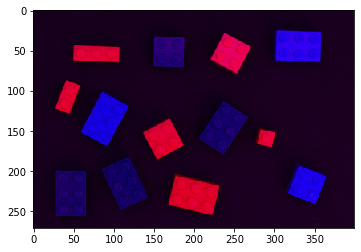

In [6]:
imgNoGreen = img2.copy() # Variable nur Referenz, daher copy() nötig
imgNoGreen[:,:,1]=0 # Grünwerte alle auf 0 setzen
plt.imshow(imgNoGreen)

# Berechnen des Grauwertbilds
Farbbilder werden in der industriellen Bildverabeitung eher selten verwendet, da sie dreimal so viele Daten enthalten wie Graustufenbilder. Deshalb wird nachfolgend gezeigt, wie aus einem Farb- ein Grauwertbild berechnet werden kann.  
Ob das Bild richtig belichtet wurde, kann man anhand des Histogramms kontrollieren.  
Oft ist man nur z.B. an einer Bildzeile interssiert, über die dann beispielsweise die gesuchte Breite einer vertikalen Säule bestimmt wird.  
Mit Bildverarbeitungsprogrammen kann nachgträglich noch Helligkeit und Kontrast des Bildes geändert werden - dadurch erhöht sich jedoch nicht der Informationsgehalt des Bildes. Deshalb werden in der industriellen Bildverabeitung solche Operationen nicht durchgeführt. Hier soll nur gezeigt werden, dass solche Operationen einfache Additionen oder Multiplikationen auf der Ebene der Matrizen darstellen. So einfach ist Bildbearbeitung!  
  
Ohne groß nachzudenken würde man annehmen, der Pixelgrauwert wäre einfach der Mittelwert aus den drei Farbwerten. Demnach könnte man das ganze Grauwertbild als Mittelwert aus den drei Farbmatrizen berechnen:

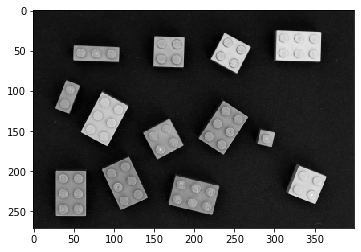

In [7]:
imgGrey = imgRed//3 + imgGreen//3 + imgBlue//3 # "//"=Ganzzahldivision
plt.imshow(imgGrey,cmap="Greys_r")

Tatsächlich ist unser Auge aber für die drei Grundfarben Rot, Grün und Blau unterschiedlich empfindlich. Deshalb muss bei der Mittelwertbildung Grün z.B. höher gewichtet werden als Rot oder Blau.  
OpenCV besitzt die Funktion `cvtColor()`, um diese Konvertierung entsprechend vorzunehmen.

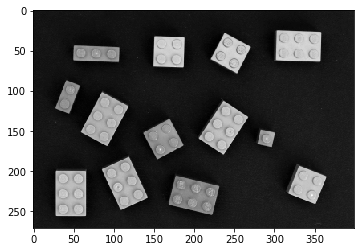

In [8]:
imgRealGrey = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(imgRealGrey,cmap="Greys_r")

# Analyse eines Grauwertbildes
## Extraktion Bildzeilen/-spalten
In dem Grauwertbild oben kann man nun mit einfachem Slicing der Matrix eine Bildzeile extrahieren und diese als Linienplot darstellen:

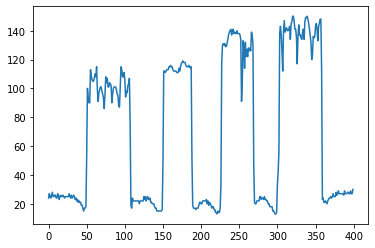

In [9]:
lineGrey = imgGrey[50,:]
plt.plot(lineGrey)

Testen Sie oben im Codefenster, wass passiert, wenn Sie eine andere Zeile oder eine Spalte nehmen.

## Histogramm zur Anlyse des Bildes
Ein Histogramm über die Grauwertverteilung lässt sich mit der OpenCV-Funktion `calcHist()`berechnen. Hierbei gibt die x-Achse den Pixelwert (also die Helligkeit von 0...255) an. Auf der y-Achse ist die Häufigkeit dieses Pixelwertes angegeben.  
Der Peak bei ca. 30 LSB entspricht dem schwarzen Hintergund des Bildes, der sehr viel mehr Pixel enthält, als die Legosteine.

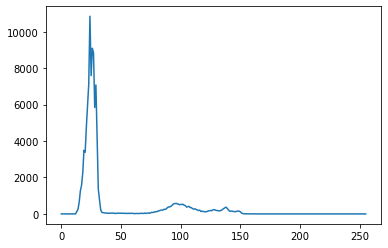

In [10]:
hist = cv2.calcHist([imgGrey],[0],None,[256],[0,256])
plt.plot(hist[:,0])

Wenn man Pixel aufgrund deren Helligkeit trennen will (*d.h. Segmentieren*), dann kann über das Histogramm der richtige Schwellwert dafür bestimmt werden. In den Fall oben würde man den Schwellwert auf den Grauwert von ca. 60 setzen, also die Mitte zwischen den beiden ersten Häufungen.  
Histogramme werden auch dafür verwendet, um eine Aufnahme auf korrekte Belichtung zu überprüfen. Im Histogramm oben finden sich oberhalb eines Grauwertes von ca. 150 keine Pixel mehr. Das Bild ist also etwas unterbelichtet.

## Bildmanipulation über einfache Matrixoperationen
Ein Bild wird heller, wenn man zu jedem Matrixelement den selben Wert addiert. Hierfür gibt es eine spezielle OpenCV-Funktion. Bei einem uint8 NumPy-Array ist das Additionsergebnis immer Modulo 255 (z.B. 200 + 120 = 320 -255 = 65). Bei OpenCV ist die Addition anders definiert: Sie ist nach Oben auf 255 und nach Unten auf 0 begrenzt.  
Dadurch werden solche Pixel über- bzw. untersteuert, genau so als würde man über- oder unterbelichten.

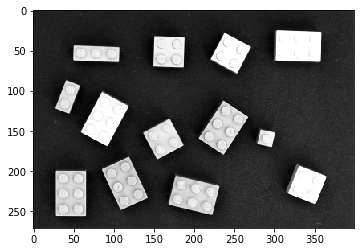

In [11]:
imgBright=cv2.add(imgGrey,130)
plt.imshow(imgBright,cmap="Greys_r")

Der Kontrast eines Bildes wird Multiplikation jedes Matrixelements mit einem konstanten Faktor geändert. Auch hier gibt es eine OpenCV-Funktion, die das Multiplikationsergebnis auf 0...255 beschränkt.

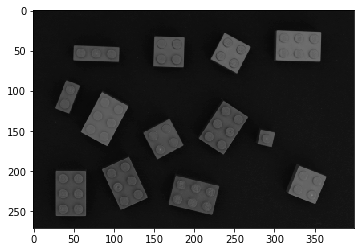

In [12]:
imgContr=cv2.multiply(imgGrey,0.6)
plt.imshow(imgContr,cmap="Greys_r",clim=(0, 255)) # "clim" damit Colormap auf 0...255 angewendet wird

# Dateiformate für Bilddaten
Bilder lassen sich in unterschiedliche Dateiformate abspeichern, die sich teils stark vom nötigen Speicherbedarf unterscheiden.  
Jedes Bildformat außer `bmp` versucht die Dateigröße für eine Bildmatrix so gering wie möglich zu halten:  
Ein Grauwertbild besteht aus einer n x m Matrix mit 8 Bit Integerwerten ("uint8") als Matrixelemente die die Helligkeit des jeweiligen Pixels angeben. In seinem Rohzustand benötigt solch eine Matrix also eine Dateigröße von n * m * 8 Bits.  
Wenn wie in dem hier verwendeten Beispielbild im Hintergrund größere Flächen mit gleichem Grauwert (hier Schwarz mit Grauwert Null) existieren, dann kann die Bilddatei *komprimiert* werden: Es wird Speicherplatz eingespart, indem nur eine Landkarte einer solchen homogenen Fläche statt die vielen Einzeldaten der in ihr enthaltenen Pixel abgespeicher wird. *Durch diese Kompression geht keine Bildinformation verloren.* Die Dateiformate TIFF und PNG verwenden ein solches Kompressionsverfahren.  
Im Vergleich dazu verwendet das Format JPG eine **verlustbehaftete Kompression**: Bildbereiche werden leicht verändert, so dass sie weniger Speicherplatz benötigen, gleichzeitig das menschliche Auge dies aber nur bei ganz genauem Hinsehen erkennt.
Nachfolgend wird die Matrix des Grauwertbilds in verschiedenen Dateiformaten abgespeichert.  

In [13]:
cv2.imwrite('legoRealGrey.png',imgRealGrey) # Datei ca. 46 kByte groß
cv2.imwrite('legoRealGrey.tiff',imgRealGrey) # Datei ca. 53 kByte groß
cv2.imwrite('legoRealGrey.bmp',imgRealGrey) # Datei ca. 107 kByte groß
cv2.imwrite('legoRealGrey.jpg',imgRealGrey) # Datei ca. 23 kByte groß

True

Bei der industriellen Bildverarbeitung werden selten verlustbehaftete Kompressionsverfahren verwendet. Da man aber auch hier auf möglichst geringe Dateigrößen angewiesen ist, verwendet man nur selten Farbbilder. Grauwertbilder werden so früh wie möglich in Binärbilder überführt, da sich damit das Volumen der Rohdaten um den Faktor Acht reduziert. (1 Bit pro Pixel statt 8 Bit.)   
Wenn man wie in diesem Beispielbild später nur die Anzahl, die Größe und die Position der Legosteine via Bildverarbeitung bestimmen will, dann reicht die Information im Binärbild dazu völlig aus.  
Nachfolgend wird aus dem Grauwertbild über die OpenCV Schwellwertfunktion `threshold()` ein Binärbild erzeugt: Für jedes Pixel wird geprüft, ob sein Grauwert über oder unter dem Schwellwert liegt. Je nach dem wird ihm dann der Wert Null oder Eins zugeordnet.


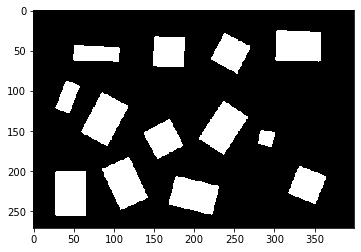

In [14]:
dummy,imgBin = cv2.threshold(imgRealGrey,60,255,cv2.THRESH_BINARY)
plt.imshow(imgBin,cmap="Greys_r")

Die Matrix des Binärbildes könnte nun vom Typ Boolean sein, was aber aus Kompatibilitätsgründen von der OpenCV-Python-Bibliothek nicht so gehandhabt wird.  
Speichert man das Binärbild wieder in die verschiedenen Dateiformate ab, so zeigt sich, dass der Speicherbedarf durch das Binarisieren erheblich gesunken ist.

In [15]:
cv2.imwrite('legoBin.png',imgBin) # Datei ca. 3 kByte groß
cv2.imwrite('legoBin.tiff',imgBin) # Datei ca. 4 kByte groß
cv2.imwrite('legoBin.bmp',imgBin) # Datei ca. 107 kByte groß
cv2.imwrite('legoBin.jpg',imgBin) # Datei ca. 16 kByte groß

True

# Bildananlyse
Bildverarbeitung funktioniert immer *"Bottom Up"*: Die Analyse startet beim Grauwert eines einzelnen Pixels, fasst dann Pixelbereiche mit homogenen Eigenschaften zusammen (*genannt Pixelklassifizierung*), ordnet danach den verschiedenen Pixelbereichen Objekte zu (*genannt Labeling*) und berechnet schließlich für jedes dieser Objekt meist geometrische Merkmale wie Schwerpunktlage oder Fläche (*gennant Merkmalsextraktion*).  
Diese Kombination von Arbeitsschritten nennt man *Bildverarbeitungskette*. In nachfolgend dargestellten Beispiel besteht die Pixelklassifizierung aus der Auswahl der roten Pixel. Dadurch entsteht ein Binärbild, welches nur den Fußabdruck der roten Legosteine zeigt. Das anschließende Labeling zählt gewissermaßen die gefundenen roten Steine. In der Mekrmalsextraktion wird der Schwerpunkt des ersten gefundenen roten Legosteins ausgegeben.

## Pixelklassifizierung nach Farbe

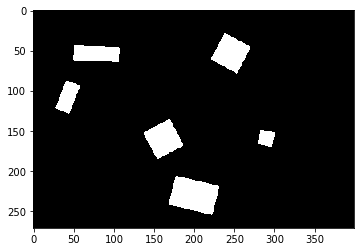

In [16]:
dummy,imgBinRed = cv2.threshold(imgRed,140,255,cv2.THRESH_BINARY) # Binarisierung durch Schwellwert auf rote Matrix
plt.imshow(imgBinRed,cmap="Greys_r")

## Labeling
Nachdem die roten Pixel im Binärbild oben durch einen Schwellwertvegleich klassifiziert wurden, wird die OpenCV-Funktion `connectedComponents()` verwendet, um ein Labeling durchzuführen. Das Ergebnis hiervon ist ein Binärbild, bei dem die Fußabdrücke der roten Legosteine nicht mehr alle den Pixelwert Eins haben, sondern durchnummeriert werden: Alle Pixel des ersten Legosteins erhalten den Wert Eins, alle Pixel des zweiten Legosteins den Wert Zwei usw.  
Dieses Ergebnisbild ist unten dargestellt, wobei jedem Zahlenwert eine andere Farbe zugeordnet ist.

Es wurden 6 Legosteine gefunden.


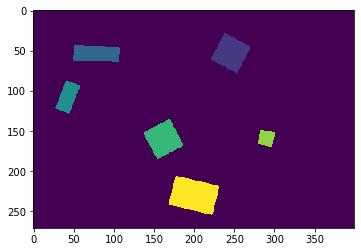

In [17]:
dummy, labels = cv2.connectedComponents(imgBinRed)
plt.imshow(labels)
print('Es wurden {} Legosteine gefunden.'.format(labels.max())) # Maximaler Pixelwert gibt Anzahl Steine an

## Merkmalsextraktion
In diesem letzten Schritt der Bildverarbeitungskette wirr für den Legostein mit Label Eins (erster gefundener Stein) dessen Schwerpunktskoordinaten über die "Momente" seines Fußabdrucks mit der OpenCV-Funktion `moments()` berechnet und ausgegeben.  
Momente sind eigentlich Kenngrößen statistischer Zufallsverteilungen. In der digitalen
Bildverarbeitung werden sie dazu benutzt, eine Pixelverteilung (die ja auch so etwas ist wie
eine Zufallsverteilung) zu charakterisieren. In den Momenten stecken dann z.B. die
Parameter Größe, Form und Lage des Pixelsbereichs.

Legostein Nr. 1: x = 246, y = 53


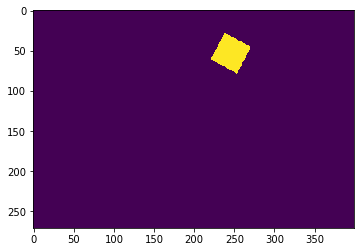

In [18]:
BrickOne = (labels == 1).astype(dtype='uint8') # uint8-Matrix erstellen mit Binärbild für Legostein mit Label 1
plt.imshow(BrickOne)
BrickOneMom = cv2.moments(BrickOne) # Berechnung der Momente
cX = int(BrickOneMom["m10"] / BrickOneMom["m00"])
cY = int(BrickOneMom["m01"] / BrickOneMom["m00"])
print('Legostein Nr. 1: x = {0}, y = {1}'.format(cX,cY))